<a href="https://colab.research.google.com/github/Ishlafakhri/RFM-Customer-Segmentation/blob/main/RFM_Segmentation_Using_K_Means_Online_Retails_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library and Dataset

In [1]:
#Install Plotly for Data Visualization
!pip install plotly

In [2]:
#Import Libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations on arrays
import matplotlib.pyplot as plt  # For creating plots and graphs
import seaborn as sns  # For making attractive and informative statistical graphics
from datetime import timedelta  # For handling time-based calculations
import plotly.express as px  # For interactive visualizations

In [3]:
#Import Data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load a CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Project Data Science/Online_Retail.csv', encoding='ISO-8859-1')

In [5]:
# Display the first five rows
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [6]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#Data Cleaning and Preprocessing

In [7]:
import pandas as pd  # Importing the pandas library

# Dropping rows where 'CustomerID' is missing (NaN)
df = df.dropna(subset=['CustomerID'])

# Converting 'CustomerID' first to integer, then to string.
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

# Converting 'InvoiceDate' to a datetime object.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Exploratory Data Analysis

In [8]:
'''
This visualization shows that our data contains outliers with negative quantities,
which are not supposed to be negative. After a thorough examination of the dataset,
we realized that we have not yet removed the cancelled products. Therefore,
we need to remove these cancelled products.
'''

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'df' is your DataFrame with 'UnitPrice' and 'Quantity' columns
fig = make_subplots(rows=1, cols=2)

# Add a vertical boxplot for 'Quantity' in the first column
fig.add_trace(go.Box(y=df['Quantity'], name='Quantity'), row=1, col=1)

# Add a vertical boxplot for 'UnitPrice' in the second column
fig.add_trace(go.Box(y=df['UnitPrice'], name='UnitPrice'), row=1, col=2)

# Update the layout
fig.update_layout(
    title='Boxplots for Quantity and Unit Price',
    height=400,  # Adjust height as needed
    width=800    # Adjust width as needed
)

# Show the plot
fig.show()

In [9]:
# Removing rows where 'InvoiceNo' contains the letter 'C', 'C' Stands for cancellation
df = df[~df["InvoiceNo"].str.contains("C", na=False)]

In [10]:
# Boxplot visualization after we removed cancellation products
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'df' is your DataFrame with 'UnitPrice' and 'Quantity' columns
fig = make_subplots(rows=1, cols=2)

# Add a vertical boxplot for 'Quantity' in the first column
fig.add_trace(go.Box(y=df['Quantity'], name='Quantity'), row=1, col=1)

# Add a vertical boxplot for 'UnitPrice' in the second column
fig.add_trace(go.Box(y=df['UnitPrice'], name='UnitPrice'), row=1, col=2)

# Update the layout
fig.update_layout(
    title='Boxplots for Quantity and Unit Price',
    height=400,  # Adjust height as needed
    width=800    # Adjust width as needed
)

# Show the plot
fig.show()

In [11]:
# Print statistical summaries
print(df.describe())

            Quantity      UnitPrice
count  397924.000000  397924.000000
mean       13.021823       3.116174
std       180.420210      22.096788
min         1.000000       0.000000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000


In [12]:
'''
Based on the Boxplot Visualization and statistical summaries,
the data still contains outliers. Therefore, we need to remove these outliers
'''

# Function to remove outliers from a column
def remove_outliers(df, column):
    # Calculate IQR and define bounds for outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# Apply the function to each numeric column
for column in df.select_dtypes(include='number').columns:
    df = remove_outliers(df, column)

In [13]:
# Print statistical summaries after remove outliers
'''
From the data statistical summaries, we can conclude that we now have a clean and ready-to-use dataset for modeling.
'''
print(df.describe())

            Quantity      UnitPrice
count  338182.000000  338182.000000
mean        7.476811       2.191816
std         6.770883       1.544842
min         1.000000       0.000000
25%         2.000000       1.250000
50%         6.000000       1.650000
75%        12.000000       2.950000
max        27.000000       7.500000


In [14]:
# Boxplot visualization after remove outliers
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'df' is your DataFrame with 'UnitPrice' and 'Quantity' columns
fig = make_subplots(rows=1, cols=2)

# Add a vertical boxplot for 'Quantity' in the first column
fig.add_trace(go.Box(y=df['Quantity'], name='Quantity'), row=1, col=1)

# Add a vertical boxplot for 'UnitPrice' in the second column
fig.add_trace(go.Box(y=df['UnitPrice'], name='UnitPrice'), row=1, col=2)

# Update the layout
fig.update_layout(
    title='Boxplots for Quantity and Unit Price',
    height=400,  # Adjust height as needed
    width=800    # Adjust width as needed
)

# Show the plot
fig.show()

#Data Modelling

In [15]:
# Printing the number of rows and columns
print('{:,} rows; {:,} columns'
      .format(df.shape[0], df.shape[1]))
# Printing the number of transactions without a CustomerID
print('{:,} transactions don\'t have a CustomerID'
      .format(df[df.CustomerID.isnull()].shape[0]))
# Printing the timeframe of transactions
print('Transactions timeframe from {} to {}'.format(df['InvoiceDate'].min(),
                                    df['InvoiceDate'].max()))

338,182 rows; 8 columns
0 transactions don't have a CustomerID
Transactions timeframe from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [16]:
# --Group data by CustomerID--

# Calculating the total sum for each transaction
df['TotalSum'] = df['UnitPrice']*df['Quantity']

# Setting the snapshot date to the day after the last transaction
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
print(snapshot_date)

# Aggregating data per customer
data_process = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, #Calculate recency as days since last purchase
    'InvoiceNo': 'nunique',  #Count the unique number of invoices as frequency
    'TotalSum': 'sum' #Sum the total monetary value of purchases
})

#Renaming columns to more descriptive names for RFM analysis
data_process.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

# Rounding the results
data_process = data_process.astype(int)

2011-12-10 12:50:00


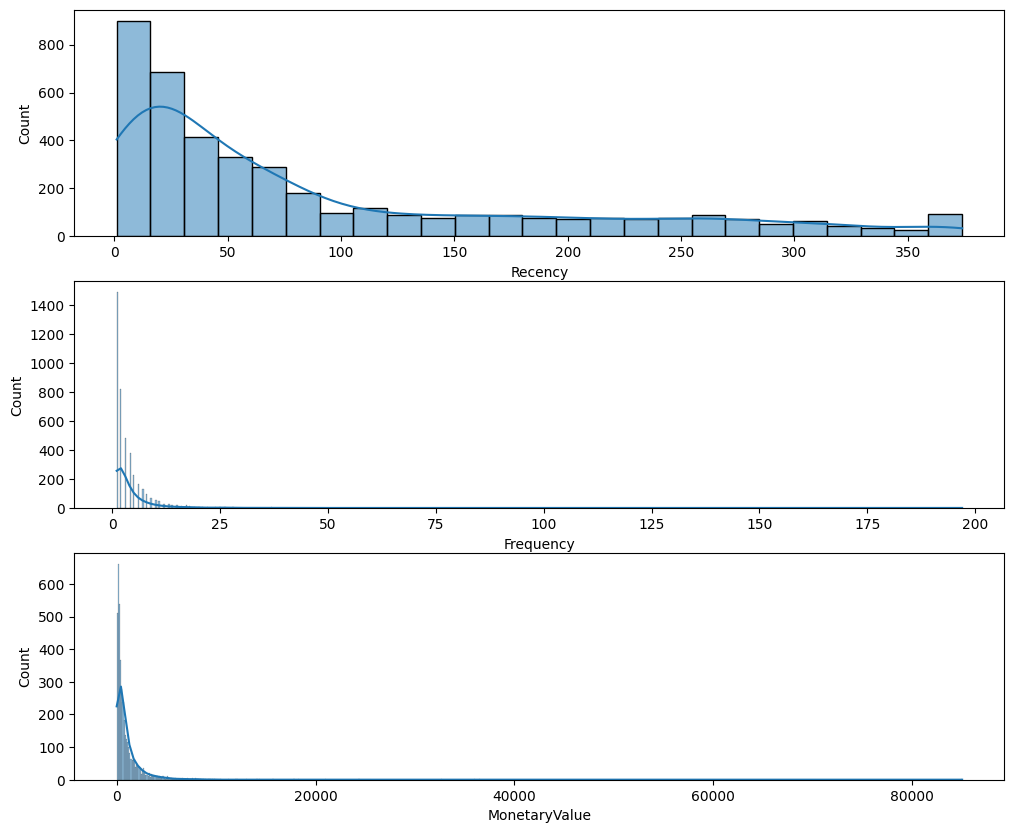

In [17]:
# Plot RFM distributions
plt.figure(figsize=(12,10))

# Plot distribution of R
plt.subplot(3, 1, 1)
sns.histplot(data_process['Recency'], kde=True)

# Plot distribution of F
plt.subplot(3, 1, 2)
sns.histplot(data_process['Frequency'], kde=True)

# Plot distribution of M
plt.subplot(3, 1, 3)
sns.histplot(data_process['MonetaryValue'], kde=True)

# Show the plot
plt.show()

In [18]:
'''
Our dataset exhibits a skewed distribution;
therefore, we need to standardize our data first.
'''
#Import Library
from sklearn.preprocessing import StandardScaler

# Define the feature columns to be standardized.
feature_cols = ['Recency','Frequency','MonetaryValue']

#Create a copy of the dataframe to hold the standardized values. This ensures the original data is not modified.
standardized_data = data_process.copy()

#Initialize the StandardScaler
scaler = StandardScaler()

#Compute the mean and standard deviation for scaling later, using only the feature columns specified earlier.
scaler.fit(data_process[feature_cols])

#Perform standardization by centering and scaling, based on the mean and standard deviation computed above.
standardized_features = scaler.transform(data_process[feature_cols])

#Update the original dataframe with the standardized values for the feature columns.
standardized_data[feature_cols] = standardized_features

In [19]:
# fit K-means clustering on various Ks
from sklearn.cluster import KMeans
kmeans_kwargs = {
    "init" : "random",
    "n_init" : 10
}
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(standardized_data[feature_cols])
    sse.append(kmeans.inertia_)

In [20]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=sse, mode='lines+markers'))
fig.update_layout(
    title="Elbow Method for Optimal Number of Clusters",
    xaxis_title="Number of Clusters",
    yaxis_title="Sum of Squared Error"
)
fig.show()

In [21]:
from sklearn.cluster import KMeans

# Your KMeans configuration
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,  # This can be set to define the maximum number of iterations
    "random_state": 42  # Set the random state for reproducibility
}

# Run KMeans with the optimal k
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(standardized_data[feature_cols])

# Add 1 to each label to change cluster numbering from 1
data_process['cluster'] = kmeans.labels_ + 1

# Reset the index of the DataFrame so 'CustomerID' becomes a regular column
data_process = data_process.reset_index()

# Group by cluster and calculate means and counts
centroid_df = data_process.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'CustomerID': 'nunique'
}).reset_index()

# Rename the 'CustomerID' column to 'NumCustomers'
centroid_df = centroid_df.rename(columns={'CustomerID': 'NumCustomers'})

# Sort by 'Frequency' in descending order
centroid_df = centroid_df.sort_values(by='Frequency', ascending=False)

# Add a new column 'MapCluster' based on frequency quartiles
centroid_df['MapCluster'] = pd.qcut(centroid_df['Frequency'], 3, labels=[1, 2, 3])

# Convert 'MapCluster' to integer type
centroid_df['MapCluster'] = centroid_df['MapCluster'].astype(int)

# Merge centroid_df with data_process to add 'MapCluster'
data_process = data_process.merge(centroid_df[['cluster', 'MapCluster']], on='cluster', how='left').reset_index(drop=True)

#Result

In [22]:
# Assigning cluster names to the centroids in the dataframe
cluster_names = ['Platinum', 'Gold', 'Silver']
# Adds a new column 'ClusterName' to centroid_df with the provided names
centroid_df['ClusterName'] = cluster_names
# Display the dataframe with the new 'ClusterName' column
centroid_df

cluster     Recency   Frequency  MonetaryValue  NumCustomers  MapCluster  \
0        1    2.750000  103.875000   32693.750000             8           3   
1        2   39.731802    4.627629    1202.167583          3091           2   
2        3  242.225984    1.555352     310.493138          1093           1   

  ClusterName  
0    Platinum  
1        Gold  
2      Silver

In [23]:
# Define rfm_level function
def rfm_level(data_process):
    if data_process['MapCluster'] == 3:
        return 'Platinum'
    elif (data_process['MapCluster'] == 2):
        return 'Gold'
    else:
        return 'Silver'
# Create a new variable RFM_Level
data_process['RFM_Level'] = data_process.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
data_process.head()

CustomerID  Recency  Frequency  MonetaryValue  cluster  MapCluster RFM_Level
0      12347        2          7           3314        2           2      Gold
1      12348      249          3             90        3           1    Silver
2      12349       19          1            999        2           2      Gold
3      12350      310          1            294        3           1    Silver
4      12352       36          7           1130        2           2      Gold

In [24]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_level_agg = data_process.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
})

# Round 'Recency' and 'Frequency' to the nearest integer
rfm_level_agg['Recency'] = rfm_level_agg['Recency'].round(0).astype(int)
rfm_level_agg[('Frequency', 'mean')] = rfm_level_agg[('Frequency', 'mean')].round(0).astype(int)

# Format 'MonetaryValue' mean as dollars currency
rfm_level_agg[('MonetaryValue', 'mean')] = rfm_level_agg[('MonetaryValue', 'mean')].apply(
    lambda x: '${:,.0f}'.format(round(x))
)

# Sort the DataFrame by 'Frequency' in descending order
rfm_level_agg = rfm_level_agg.sort_values(by=('Frequency', 'mean'), ascending=False)

# Print the sorted and formatted aggregated dataset
print(rfm_level_agg)

          Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Platinum        3       104       $32,694     8
Gold           40         5        $1,202  3091
Silver        242         2          $310  1093


In [25]:
# Group by RFM_Level and MapCluster, then calculate total values
final_df = data_process.groupby(['RFM_Level', 'MapCluster']).agg({
    'CustomerID': 'nunique',  # Count unique customers
    'Frequency': 'sum',  # Calculate total Frequency
    'MonetaryValue': 'sum'  # Calculate total Monetary Value
}).reset_index()

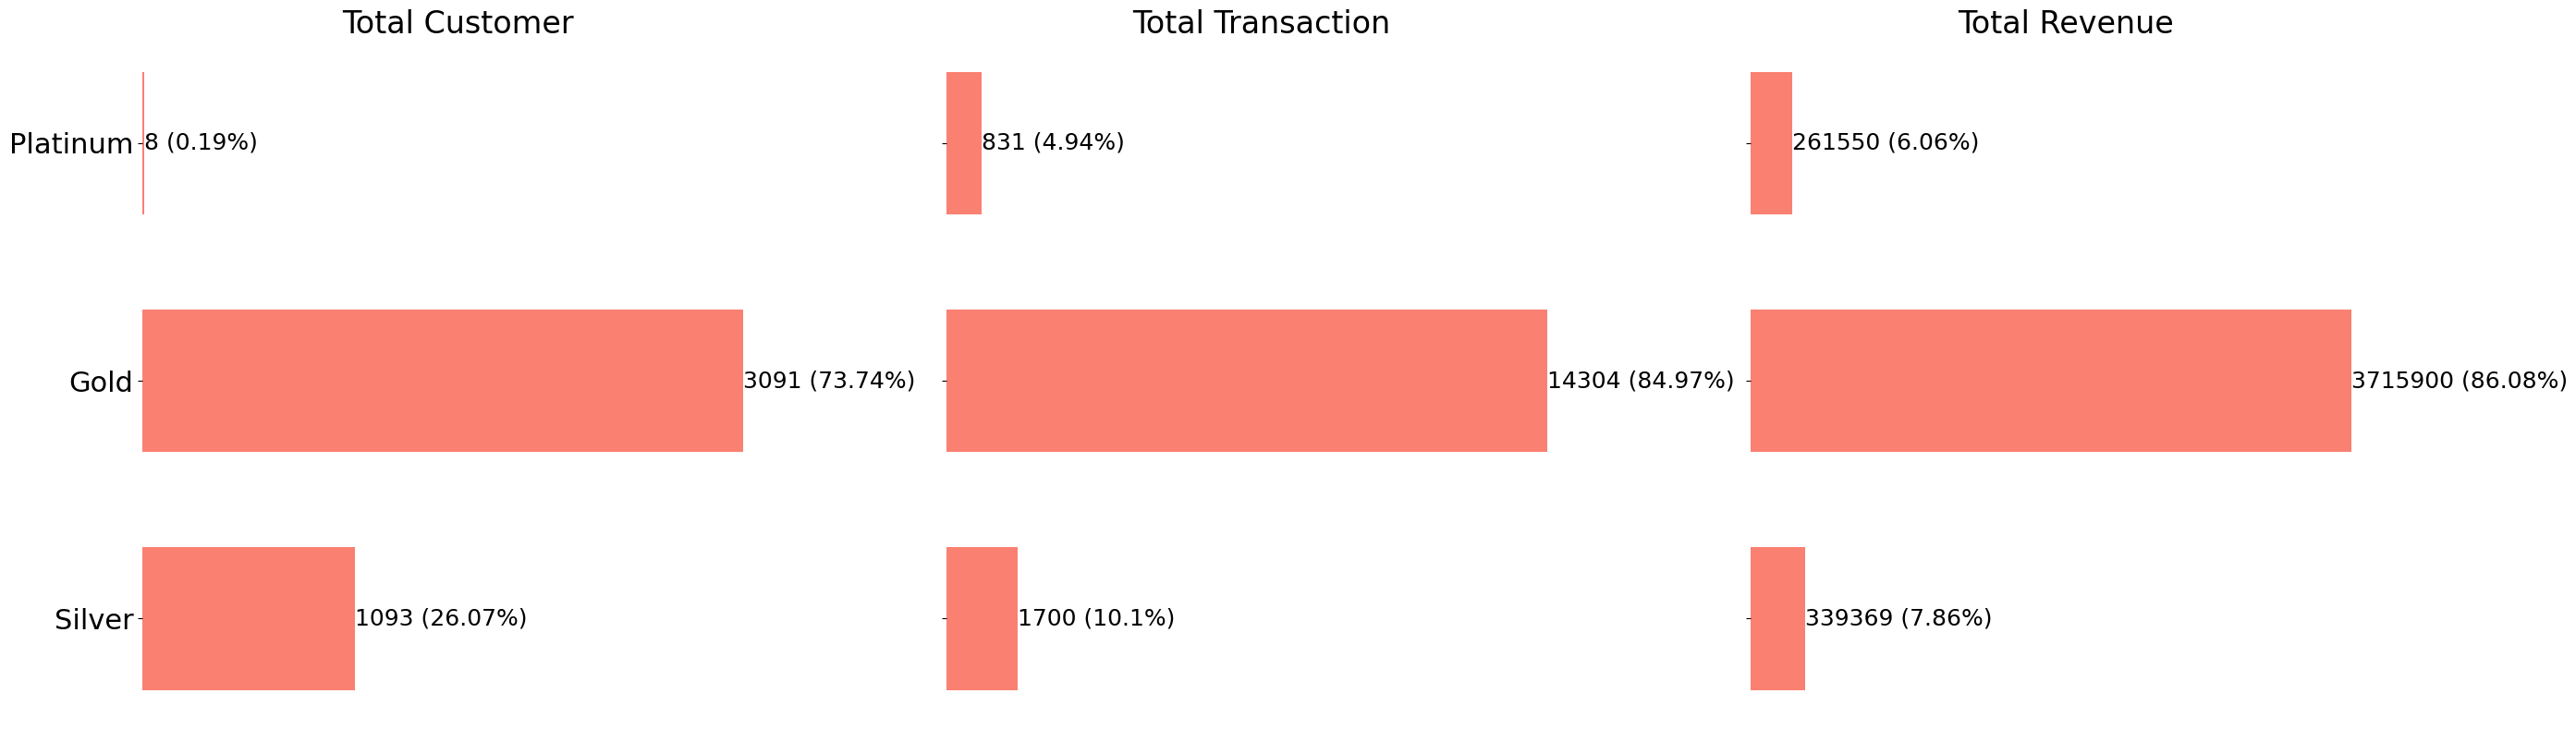

In [26]:
# Calculate percentages for each column
final_df['Customer_Percentage'] = (final_df['CustomerID'] / final_df['CustomerID'].sum() * 100).round(2)
final_df['Frequency_Percentage'] = (final_df['Frequency'] / final_df['Frequency'].sum() * 100).round(2)
final_df['MonetaryValue_Percentage'] = (final_df['MonetaryValue'] / final_df['MonetaryValue'].sum() * 100).round(2)

# Sort the DataFrame by 'MapCluster' for visualization purposes
final_df.sort_values('MapCluster', inplace=True)

# Set the font size for annotations, labels, and titles
annotation_font_size = 18  # Adjust this value for the text inside the bars
labels_font_size = 22      # Adjust this value for the y-axis labels
title_font_size = 24      # Adjust this value for the titles

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(28, 8), sharey=True)

# Define the columns and titles
columns = ['CustomerID', 'Frequency', 'MonetaryValue']
titles = ['Total Customer', 'Total Transaction', 'Total Revenue']
percentages = [final_df['Customer_Percentage'], final_df['Frequency_Percentage'], final_df['MonetaryValue_Percentage']]

# Define the bar thickness
bar_thickness = 0.6  # Adjust this value to your preference

# Loop through each column to create the bar charts
for ax, col, title in zip(axes, columns, titles):
    # Plot the data with increased bar thickness
    ax.barh(final_df['RFM_Level'], final_df[col], color='salmon', height=bar_thickness)
    ax.set_title(title, size=title_font_size)

    # Set the y-ticks and labels according to the sorted DataFrame
    ax.set_yticks(range(len(final_df['RFM_Level'])))
    ax.set_yticklabels(final_df['RFM_Level'], fontsize=labels_font_size)

    # Remove the x-axis (this will remove both the ticks and labels)
    ax.get_xaxis().set_visible(False)

    # Annotate the bars with the value and percentage
    for i, value in enumerate(final_df[col]):
        # Find the corresponding percentage column name based on the 'col' variable
        if col == 'CustomerID':
            perc = 'Customer_Percentage'
        elif col == 'Frequency':
            perc = 'Frequency_Percentage'
        elif col == 'MonetaryValue':
            perc = 'MonetaryValue_Percentage'

        # Retrieve the percentage value using the correct percentage column name
        pct = final_df[perc].iloc[i]
        ax.text(value, i, f'{value} ({pct}%)', ha='left', va='center', fontsize=annotation_font_size)

    # Remove the spines for each subplot
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [27]:
import plotly.express as px
# Creating a 3D scatter plot for RFM segmentation with color mapping for different RFM levels.
fig = px.scatter_3d(data_process, x='Recency', y='Frequency', z='MonetaryValue',
              color='RFM_Level', color_discrete_map={"Platinum": "blue", "Gold": "gold", "Silver": "darkgrey"},
              title="RFM Segmentation")
fig.show()  # Displays the plot in an interactive window.